In [1]:
import meep as mp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

from numpy.fft import fft, ifft, fftfreq

## 參數設定
100001數

In [2]:
##

resolution = 50                # pixels/um
dpml = 1.0                      # PML thickness
sz = 16 + 2*dpml
cell_size = mp.Vector3(z=sz)
pml_layers = [mp.PML(dpml)]

dimensions = 1
tsim = 1000
courant = 0.5 
dt = courant  / resolution
Nt = int(tsim/dt + 1)
tslice = np.linspace(0, tsim, Nt)

##
omegal = 2 * np.pi / Nt * np.linspace(0,Nt-1,Nt) 
ml = np.random.normal(0,1,Nt)
nl = np.random.normal(0,1,Nt)


## 未加上常數
k=1 , 0.5

In [3]:
##

def Dnsqr(omega,T):
    x = np.abs(omega/T)
    if x > 1e-3:
        tmp = omega / (np.exp(omega/T)-1) / T
        output = 6 /np.pi/T  * tmp
    else:
        output = 6 /np.pi/T * (1 - x/2 + x **2/12 -x**4/720) ## Taylor expansion
    
    output = np.sqrt(output)
    return output

tempe = 1
dlsqr = np.empty(Nt)

for i in range(Nt):
     dlsqr[i] = Dnsqr(omegal[i],tempe) 

fc =  (ml + 1j * nl) *dlsqr ## Fourier component from Eq. 6        
    
## use fft to generate signal
ts1 = time.time()

  

Ef = ifft(fc)

te1 = time.time()

/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


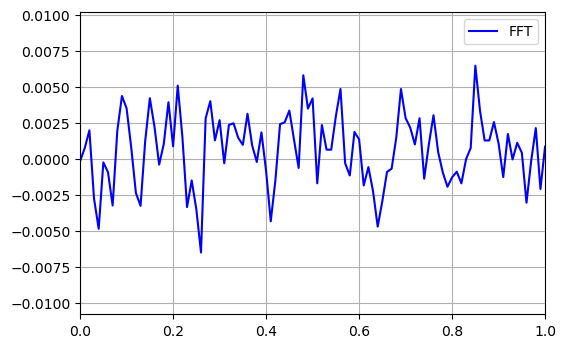

using FFT 0.025440454483032227


In [4]:
fig = plt.figure(dpi=100)
plt.plot(tslice,np.real(Ef),'b',label = 'FFT',linewidth=1.5)
plt.xlim(0,1)
plt.legend()
plt.grid()
plt.show()

print('using FFT', te1-ts1)

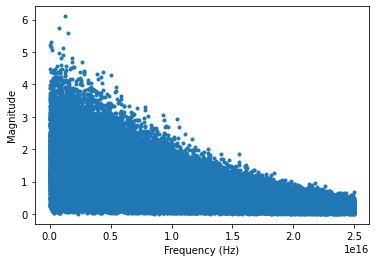

In [5]:
dft = np.fft.fft(Ef)

# Compute the frequencies associated with each DFT coefficient
freqs = np.linspace(0,25*1e15,100001)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(freqs,abs(dft),'.')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()